<a href="https://colab.research.google.com/github/MarianaCoronaAldana/Sistemas_Inteligentes_II/blob/main/Pr%C3%A1ctica_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/5%20Transformación%20de%20similitud/ref_1.png'
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/5%20Transformación%20de%20similitud/des.png'

import cv2
import matplotlib.pyplot as plt
import math
import numpy as np
from google.colab.patches import cv2_imshow
from IPython import display

--2024-10-07 05:02:52--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/5%20Transformaci%C3%B3n%20de%20similitud/ref_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6126 (6.0K) [image/png]
Saving to: ‘ref_1.png’

ref_1.png           100%[===================>]   5.98K  --.-KB/s    in 0s      

2024-10-07 05:02:52 (17.3 MB/s) - ‘ref_1.png’ saved [6126/6126]

--2024-10-07 05:02:52--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/5%20Transformaci%C3%B3n%20de%20similitud/des.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 2

# Funciones

Transformación de similitud

In [2]:
def Transformacion_Similitud(q,x):
    dx = q[0]
    dy = q[1]
    theta = q[2]
    s = q[3]

    xp1 = [s*np.cos(theta)*x[0]-s*np.sin(theta)*x[1]+dx]
    xp2 = [s*np.sin(theta)*x[0]+s*np.cos(theta)*x[1]+dy]
    xp = np.array([xp1, xp2])
    return xp

Distancia Euclidiana

In [3]:
def Distancia_Euclidiana(xr, xp):
    e = np.sqrt((xr[0]-xp[0])**2 + (xr[1]-xp[1])**2)
    return e

Generar Resultado

In [4]:
def Generar_Resultado(q, img_dst, img_ref):
    dx = q[0]
    dy = q[1]
    theta = q[2]
    s = q[3]

    T = np.matrix([[s*np.cos(theta), -s*np.sin(theta), dx],
                   [s*np.sin(theta), s*np.cos(theta), dy],
                   [0, 0, 1]])
    Tp = T.T

    N, M, _ = img_ref.shape
    n, m, _ = img_dst.shape

    img_out= cv2.warpPerspective(img_dst, T, (M, N))

    # Para pegar una imagen sobre otra
    thresh = cv2.threshold(cv2.cvtColor(img_out, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY)[1]
    foreground = img_out.copy()
    background = img_ref.copy()
    alpha = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
    foreground = foreground.astype(float)
    background = background.astype(float)
    alpha = alpha.astype(float) / 255
    foreground = cv2.multiply(alpha, foreground)
    background = cv2.multiply(1 - alpha, background)
    outImage = cv2.add(foreground, background)
    outImage = outImage.astype(np.uint8)

    return outImage

Recombinacion

In [214]:
def Recombination(x1, x2):
    n = np.size(x1)
    y = np.zeros(n)
    Tipo_Recomb = 1 # sexual discreta -> 1, sexual intermedia -> 0
    for d in range(n):
        if Tipo_Recomb == 1:
            if np.random.randint(0,2):
                y[d] = x1[d]
            else:
                y[d] = x2[d]
        else:
            y[d] = 0.5 * (x1[d] + x2[d])
    return y

Selección por Ranking

In [170]:
def Selection(fitness):
    Idx = np.argsort(fitness)
    #Idx = Idx[::-1]
    N = (fitness.size)

    rank = np.arange(N,-1,-1)
    rank_total = np.sum(rank)

    r = np.random.rand()
    p_sum = 0

    for i in range(N):
      p_sum = p_sum + rank[i] / rank_total

      if p_sum >= r:
          n = Idx[i]
          return n

# Algoritmo

Leer imágenes de entrada (qr y dst)

In [6]:
img_ref = cv2.imread('ref_1.png')
H, W, _ = img_ref.shape

img_dst = cv2.imread('des.png')
h, w, _ = img_dst.shape

Detectar QR

In [239]:
detect = cv2.QRCodeDetector()
_, points, _ = detect.detectAndDecode(img_ref)

# The reference points! We will want to move the other coordinates to these
xr0 = points[0, 0]
xr1 = points[0, 1]
xr2 = points[0, 2]
#xr3 = points[0, 3]

# The coordinates of the picture we will be moving
x0 = [0, 0]
x1 = [w, 0]
x2 = [w, h]

## Algoritmo de optimización

En esta parte ustedes elijan el algoritmo de optimización que gusten, dejo
la plantilla de uno de estrategias evolutivas para que se den una idea de cómo debería verse: el primer bloque son los parámetros e inicialización, el segundo es el algoritmo.

Parámetros

In [240]:
# Min and Max values of our parameters are set
xl = np.array([1,1,-math.pi,0])
xu = np.array([W,H,math.pi,10])

# Evolutive Algorithm paremters are set
G = 30 # Generations
mu = 200 # Number of parents
l = 150 # Number of offsprings
D = 4 # Dimension

# the dimension of these variables is set to contain both the parents and offspring solutions
x = np.zeros((D, mu+l))
sigma = np.zeros((D, mu+l))
fitness = np.zeros(mu+l)

p_plot = np.zeros(G)

Algoritmo

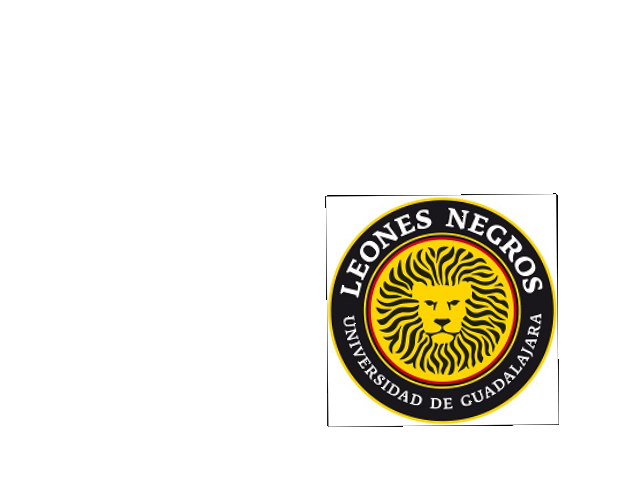

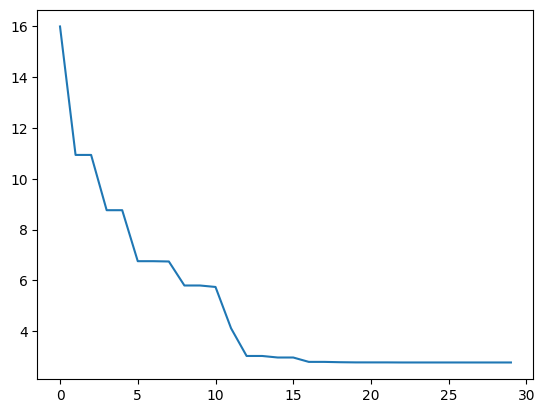

In [242]:
# First, we set the initial set of solutions
for i in range(mu):
    # a solution is randomly created, along with it's sigma vector
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    sigma[:, i] = 0.5 * np.random.rand(D)

    q = x[:,i] # These are our current solution's parameters

    # We obtain the result of using the solution on the original coordinates
    xp0 = Transformacion_Similitud(q, x0)
    xp1 = Transformacion_Similitud(q, x1)
    xp2 = Transformacion_Similitud(q, x2)

    # We compute the error between the reference and the solution's coordinates
    e0 = Distancia_Euclidiana(xr0, xp0)
    e1 = Distancia_Euclidiana(xr1, xp1)
    e2 = Distancia_Euclidiana(xr2, xp2)

    fitness[i] = (e0**2 + e1**2 + e2**2)/3 # The more close to 0, the better!

# We will create 'l' new solutions for 'G' generations
for g in range(G):
  for i in range(l):
    # We select the parents by a ranking method
    r1 = Selection(fitness)
    r2 = r1
    while r2 == r1:
        r2 = Selection(fitness)

    # The parent's genes are recombinated
    x[:, mu+i] = Recombination(x[:, r1], x[:, r2])
    sigma[:, mu+i] = Recombination(sigma[:, r1], sigma[:, r2])

    # We use the solution's sigma vector to mutate it
    r = np.random.normal(0, sigma[:, mu+i], D)
    x[:, mu+i] = x[:, mu+i] + r

    # The fitness of the new solution is calculated
    q = x[:, mu+i]
    e0 = Distancia_Euclidiana(xr0, Transformacion_Similitud(q, x0))
    e1 = Distancia_Euclidiana(xr1, Transformacion_Similitud(q, x1))
    e2 = Distancia_Euclidiana(xr2, Transformacion_Similitud(q, x2))
    fitness[mu+i] = (e0**2 + e1**2 + e2**2)/3

  # The solutions list is sorted by their fitness
  # (being the one with less error on the top of the list)
  Idx = np.argsort(fitness)
  x = x[:, Idx]
  sigma = sigma[:, Idx]
  fitness = fitness[Idx]

  # The generation's best solution's error value is saved
  min = fitness[0]
  p_plot[g] = min

# The best solution is showed
q = x[:, 0]
display.display(plt.gcf())
display.clear_output(wait=True)
img = Generar_Resultado(q, img_dst, img_ref)
cv2_imshow(img)

plt.plot(p_plot)